<a href="https://colab.research.google.com/github/roy392/cautious-goggles/blob/main/_3_HandsOn_IMDB_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

Preparing the dataset

In [ ]:
#Import dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [ ]:
#Tunjukkan ada berapa instant data untuk data training dan data testing
#Write your code here, put your comment

In [ ]:
#Tunjukkan 10 instant data data training pertama

In [ ]:
#tunjukkan 20 label data testing pertama

Restricting  to the top 10,000 most frequent words, no word index will exceed 10,000:

In [ ]:
max([max(sequence) for sequence in train_data])

9999

3D tensors
Create  Your code in numpy to represent sample of 3D Tensors

In [ ]:
#how you can quickly decode one of these reviews back to English words:
word_index = imdb.get_word_index() 
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


**Preparing the data**
You have to turn your lists into tensors. There are two ways to do that:
-Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book). 
-One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

Encoding the integer sequences into a binary matrix

In [ ]:
import numpy as np
#Write your comment about the code below
#Write your comment here

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

You should also vectorize your labels, which is straightforward:



In [ ]:

y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')


**Building the models : Networks Layers**
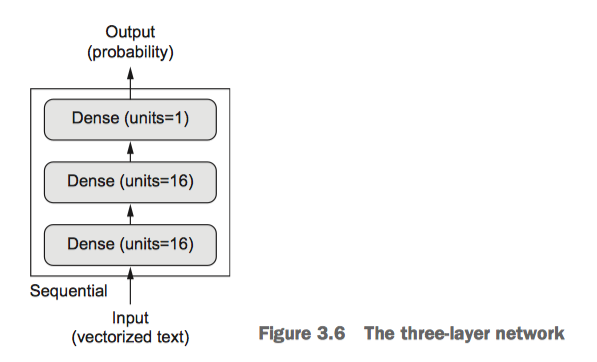

In [ ]:
from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Check, visualize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])


**Task**

Learn how to Configuring the optimizer and the usage of custom losses and metrics. Try your own code  

In [ ]:
#tulis code anda di sini

Validating your approach

In [ ]:
x_val = x_train[:10000] 
partial_x_train = x_train[10000:]
y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

Training your model

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.5133 - acc: 0.7893 - val_loss: 0.4059 - val_acc: 0.8497
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3127 - acc: 0.9047 - val_loss: 0.3114 - val_acc: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2339 - acc: 0.9260 - val_loss: 0.2830 - val_acc: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1867 - acc: 0.9407 - val_loss: 0.2764 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1551 - acc: 0.9509 - val_loss: 0.2771 - val_acc: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1280 - acc: 0.9617 - val_loss: 0.3037 - val_acc: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1078 - acc: 0.9692 - val_loss: 0.2984 - val_acc: 0.8869
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0879 - a

Plotting the training and validation loss

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
acc=history_dict['acc']

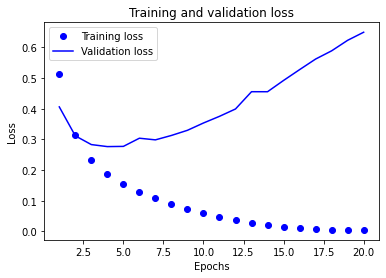

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

Plotting the training and validation accuracy

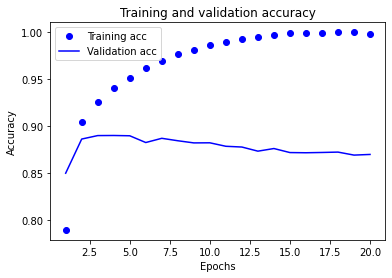

In [ ]:
plt.clf() 
#Clears the figure 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()

plt.show()

Using a trained network to generate predictions on new data

In [ ]:
score, acc = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
y_pred=model.predict(np.array(x_test))
y_pred

array([[0.02000579],
       [0.9999999 ],
       [0.6538857 ],
       ...,
       [0.00241047],
       [0.01127234],
       [0.72728074]], dtype=float32)

In [ ]:
pred = (y_pred > 0.5)

In [ ]:
pred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

0.85304
              precision    recall  f1-score   support

         pos       0.85      0.86      0.85     12500
         neg       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

[[10787  1713]
 [ 1961 10539]]


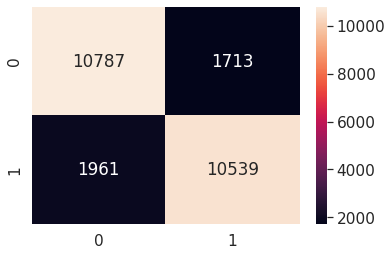

In [ ]:
#Evaluasi, Confusion matrix
import seaborn as sn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
import pandas as pd
print(metrics.accuracy_score(y_test, pred))
target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred, target_names=target_names))
print(cnf_matrix_test)
df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d')

**Further experiments/Latihan !**

Eksperimen berikut akan membantu pemahaman anda bahwa pilihan arsitektur yang dibuat semuanya cukup masuk akal, meskipun masih ada ruang untuk perbaikan:

* Anda menggunakan dua hidden layer. Coba gunakan satu atau tiga lapisan tersembunyi dan lihat bagaimana hal itu memengaruhi validasi dan akurasi pengujian.
* Coba gunakan lapisan dengan lebih banyak unit pada hidden layaer atau lebih sedikit unit tersembunyi: 32 unit, 64 unit, dan seterusnya.
* Coba gunakan fungsi mse loss selain menggunakan binary_crossentropy.
* Coba gunakan aktivasi tanh (aktivasi yang populer di masa-masa awal jaringan saraf) selain relu.

In [ ]:
#HANDS ON...
#Write your code here